In [1]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sb

from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm 
from statsmodels.discrete import discrete_model

/home/kmitchell/anaconda2/envs/py35/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
feat = pd.read_pickle('features.pkl')

In [8]:

feat[feat['PercBelowPov'] < feat['PercBelowPov'].min()+4]

,FIPS,CountyName,perc_in_labor_frc,perc_in_armfrc,p_com_carpool,p_com_workhome,perc_occ_mgt,perc_occ_svc,p_ind_whlesl,p_ind_info,...,p_samehouse,p_diffhousUS,p_abroad1yr,p_nativeUS,p_nativestate,p_nat_citz,p_spk_engl,PercBelowPov,pov_bins,pov_bin
89,2230,"Skagway Municipality, Alaska",85.7,0.0,7.9,8.2,29.5,15.5,0.5,0.9,...,78.8,20.9,0.2,83.1,26.1,21.3,87.7,4.5,low_pov,0
94,2282,"Yakutat City and Borough, Alaska",79.7,0.0,20.0,6.2,31.3,15.6,0.8,0.3,...,80.1,19.9,0.0,89.1,47.1,38.5,77.5,4.7,low_pov,0
262,8035,"Douglas County, Colorado",73.6,0.2,6.6,9.8,53.5,11.2,2.9,5.7,...,85.0,14.5,0.6,91.8,37.3,52.9,91.0,4.1,low_pov,0
725,18057,"Hamilton County, Indiana",73.3,0.1,7.2,6.1,52.3,11.5,4.2,2.4,...,86.9,12.6,0.5,91.7,58.4,47.4,90.6,4.8,low_pov,0
1323,27019,"Carver County, Minnesota",76.1,0.0,6.0,7.3,45.5,14.2,4.0,2.0,...,88.0,11.6,0.4,94.0,69.3,51.6,91.3,4.4,low_pov,0
1783,34019,"Hunterdon County, New Jersey",68.0,0.1,5.5,7.5,50.6,12.7,3.3,3.8,...,91.7,8.0,0.3,90.4,62.5,58.0,89.4,4.2,low_pov,0
1787,34027,"Morris County, New Jersey",69.2,0.0,7.8,5.2,49.5,13.0,3.1,3.7,...,92.2,7.2,0.6,79.8,57.4,56.8,75.5,4.7,low_pov,0
1999,38019,"Cavalier County, North Dakota",61.5,0.0,7.7,8.4,41.4,10.0,6.0,4.5,...,91.8,8.2,0.0,97.1,82.9,70.4,97.0,4.4,low_pov,0
2063,39041,"Delaware County, Ohio",70.6,0.1,5.1,7.1,52.1,11.4,3.6,2.5,...,88.3,11.3,0.4,93.0,68.6,58.1,92.3,4.9,low_pov,0
2402,46083,"Lincoln County, South Dakota",77.6,0.1,6.7,3.4,45.5,12.1,3.7,2.0,...,85.8,14.0,0.2,97.3,63.8,81.2,96.1,4.5,low_pov,0


In [4]:
feat.columns

Index(['FIPS', 'CountyName', 'perc_in_labor_frc', 'perc_in_armfrc',
       'p_com_carpool', 'p_com_workhome', 'perc_occ_mgt', 'perc_occ_svc',
       'p_ind_whlesl', 'p_ind_info', 'p_ind_FIRE', 'p_ind_waste',
       'p_ind_edsvc', 'p_ind_pubadm', 'ln_popdens', 'ln_housedens',
       'p_nonfamily', 'p_marrfam', 'p_malehh', 'p_femhh', 'avg_hh_size',
       'fert_age15_19', 'fert_age20_34', 'fert_age35_50', 'p_highsch',
       'p_bachdeg', 'p_civvet', 'p_civdis_18', 'p_civdis_1864', 'p_civdis_65',
       'p_samehouse', 'p_diffhousUS', 'p_abroad1yr', 'p_nativeUS',
       'p_nativestate', 'p_nat_citz', 'p_spk_engl', 'PercBelowPov', 'pov_bins',
       'pov_bin'],
      dtype='object')

In [5]:
from pylab import *

def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.
    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr, cmap=cm.PRGn, interpolation='none')
    plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
    plt.yticks(range(len(corr.columns)), corr.columns);

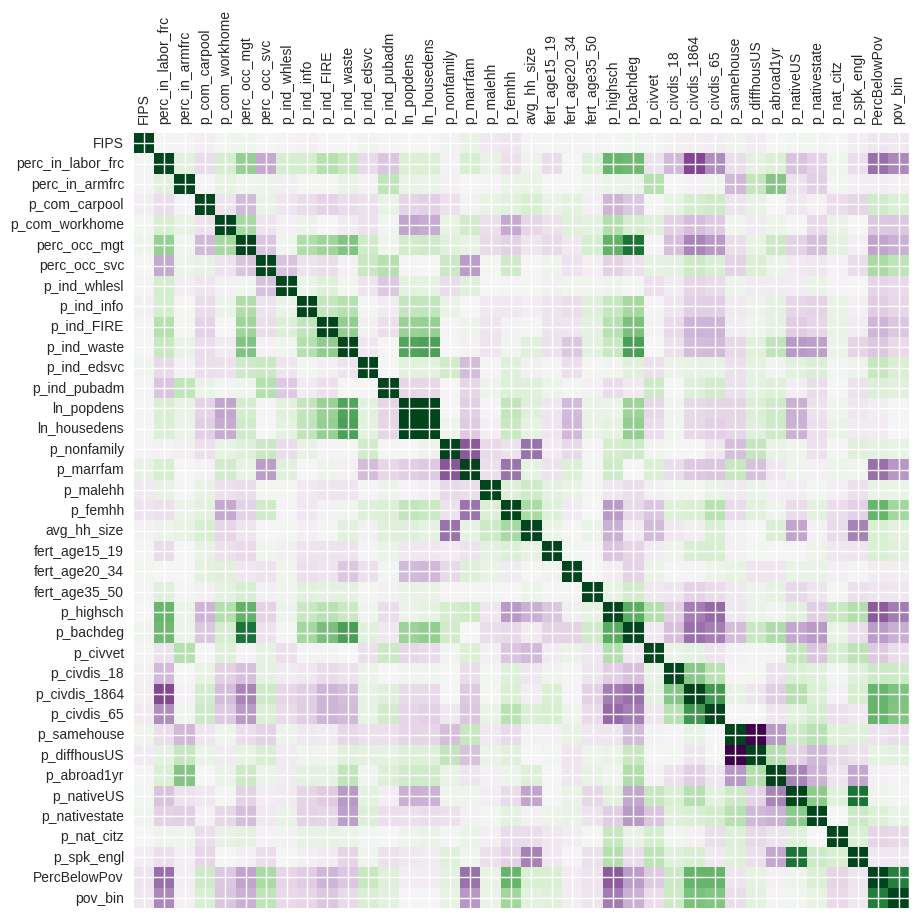

In [6]:
plot_corr(feat)

In [7]:
feat[['PercBelowPov','ln_popdens','ln_housedens']].corr()
## Population density and household density are over 99% correlated.  Do not use both.
## Choosing ln_housedens

,PercBelowPov,ln_popdens,ln_housedens
PercBelowPov,1.000000,-0.044738,-0.058067
ln_popdens,-0.044738,1.000000,0.993996
ln_housedens,-0.058067,0.993996,1.000000


In [8]:
feat[['PercBelowPov','p_marrfam','p_malehh', 'p_femhh']].corr()

,PercBelowPov,p_marrfam,p_malehh,p_femhh
PercBelowPov,1.000000,-0.590450,0.089151,0.569474
p_marrfam,-0.590450,1.000000,-0.124231,-0.579214
p_malehh,0.089151,-0.124231,1.000000,0.173265
p_femhh,0.569474,-0.579214,0.173265,1.000000


In [9]:
feat[['PercBelowPov','p_com_carpool','p_com_workhome']].corr()

,PercBelowPov,p_com_carpool,p_com_workhome
PercBelowPov,1.000000,0.236324,-0.243321
p_com_carpool,0.236324,1.000000,-0.106475
p_com_workhome,-0.243321,-0.106475,1.000000


In [10]:

feat.info()
for i in range(len(feat)):
    if feat['p_com_walk'][i] > 50:
        print(feat.loc[i,:])
#df.loc[row_indexer,column_indexer]
#plt.matshow(feat.corr())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3142 entries, 0 to 3141
Data columns (total 40 columns):
FIPS                 3142 non-null int64
CountyName           3142 non-null object
perc_in_labor_frc    3142 non-null float64
perc_in_armfrc       3142 non-null float64
p_com_carpool        3142 non-null float64
p_com_workhome       3142 non-null float64
perc_occ_mgt         3142 non-null float64
perc_occ_svc         3142 non-null float64
p_ind_whlesl         3142 non-null float64
p_ind_info           3142 non-null float64
p_ind_FIRE           3142 non-null float64
p_ind_waste          3142 non-null float64
p_ind_edsvc          3142 non-null float64
p_ind_pubadm         3142 non-null float64
ln_popdens           3142 non-null float64
ln_housedens         3142 non-null float64
p_nonfamily          3142 non-null float64
p_marrfam            3142 non-null float64
p_malehh             3142 non-null float64
p_femhh              3142 non-null float64
avg_hh_size          3142 non-null f

KeyError: 'p_com_walk'

### Conclusions for commuting variables:

* Drop public transportation, other, and walk due to very low incidence  
* Keep carpool and work from home due to significant correlations with target PercBelPov

In [11]:
import seaborn as sns
sns.set()

commutes = feat[['pov_bins','p_com_alone','p_com_carpool','p_com_pubtrans','p_com_walk','p_com_other',
                'p_com_workhome']] 
sns.pairplot(commutes, hue="pov_bins", palette="Set3", diag_kind="kde", size=2.5)


KeyError: "['p_com_alone' 'p_com_pubtrans' 'p_com_walk' 'p_com_other'] not in index"

In [ ]:
commutes = feat[['pov_bins','p_com_alone','p_com_carpool','p_com_workhome']] 
sns.pairplot(commutes, hue="pov_bins")

In [ ]:
X = feat[['perc_in_armfrc', 'perc_in_labor_frc', 
          'p_com_carpool','p_com_workhome'
          ]]
X = sm.add_constant(X)
y = targ['PercBelowPov']/100

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)

In [ ]:
t_log = sm.Logit(y_train,X_train).fit()
print (t_log.summary())

### Occupations variables: 
'perc_occ_mgt','perc_occ_svc','perc_occ_sell',
                'perc_occ_constr','perc_occ_matl'

In [ ]:
total_occ = []
for i in range(len(feat)):
    t_occ = sum(feat.loc[i,'perc_occ_mgt':'perc_occ_matl'])
    total_occ.append(t_occ)            

print(np.mean(total_commutes))    
print(np.std(total_commutes))  

In [ ]:
feat[['perc_occ_mgt','perc_occ_svc','perc_occ_sell',
                'perc_occ_constr','perc_occ_matl']].describe()

In [ ]:
occupations = feat[['pov_bins','perc_occ_mgt','perc_occ_svc','perc_occ_sell',
                'perc_occ_constr','perc_occ_matl']] 
sns.pairplot(occupations, hue="pov_bins");

In [ ]:
targ = t[['GEO.id2', 'GEO.display-label', 'HC01_VC114', 'HC01_VC124', 'HC03_VC171']].copy()
targ.columns = ['FIPS','CountyName','MedFamInc','MedWorkrEarn','PercBelowPov']
targ.head()
y = targ['PercBelowPov']/100

X = feat[[#'perc_in_armfrc',# 'perc_in_labor_frc', 
          #'p_com_carpool','p_com_workhome',
          'perc_occ_mgt', 'perc_occ_matl', 'perc_occ_sell'
          ]]
X = sm.add_constant(X)
y = targ['PercBelowPov']/100

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)
t_log = sm.Logit(y_train,X_train).fit()
print (t_log.summary())

In [ ]:
sb.jointplot(x='perc_occ_mgt', y='PercBelowPov', data=feat, space=0, kind='reg')

In [ ]:
sb.jointplot(x='perc_occ_mgt', y='perc_in_labor_frc', data=feat, space=0, kind='reg')

In [ ]:
t_log = sm.Logit(y_train,X_train).fit()
print (t_log.summary())

In [ ]:
test_pred = t_log.predict(X_test)

In [ ]:
t_reg = sm.Logit(y_train,X_train).fit_regularized(alpha=0.1,maxiter=100000)
print (t_reg.summary())

In [ ]:
plt.scatter(y_test,test_pred)
plt.xlabel('Actual Poverty Fraction')
plt.ylabel('Predicted Poverty Fraction');

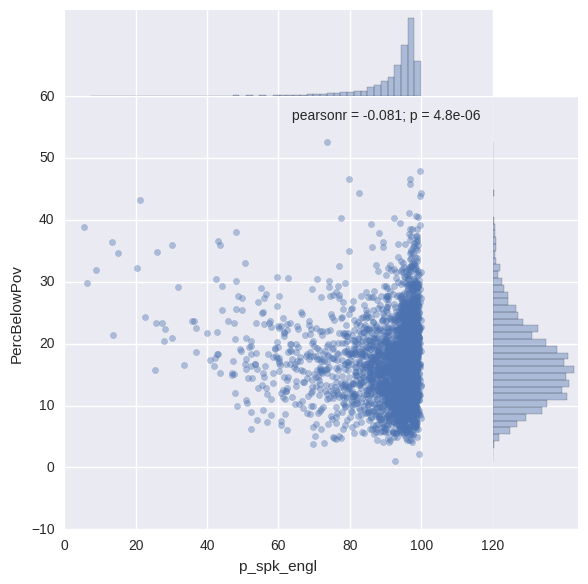

In [13]:
sb.jointplot(x='p_spk_engl', y='PercBelowPov', data=feat, space=0, alpha=0.4)

In [ ]:
sb.jointplot(x='MedFamInc', y='PercBelowPov', data=targ, space=0, alpha=0.4);

In [ ]:
sb.jointplot(x='PercBelowPov', y='MedWorkrEarn', data=targ, space=0, alpha=0.4);